EN2550 - Fundementals of Image Processing and Machine Vision

Name : R.G.S.M. RANATUNGA

Index No. : 190504H

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Part 1

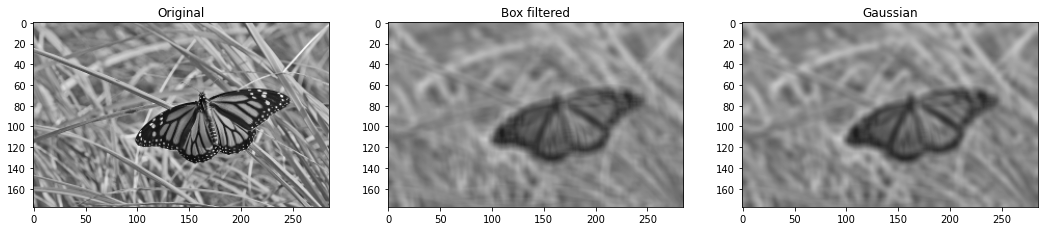

In [4]:
k_size = 9
sigma = 4
img = cv.imread(r'./butterfly.jpg', cv.IMREAD_REDUCED_GRAYSCALE_4)
assert img is not None

box_kernel = 1./81*np.ones((9,9))
img_avg = cv.filter2D(img, -1, box_kernel)
img_gau = cv.GaussianBlur(img, (k_size, k_size), sigma )

fig, ax = plt.subplots(1,3, figsize=(18,6))
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[1].imshow(img_avg, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Box filtered')
ax[2].imshow(img_gau, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Gaussian')
plt.show()


Part 3

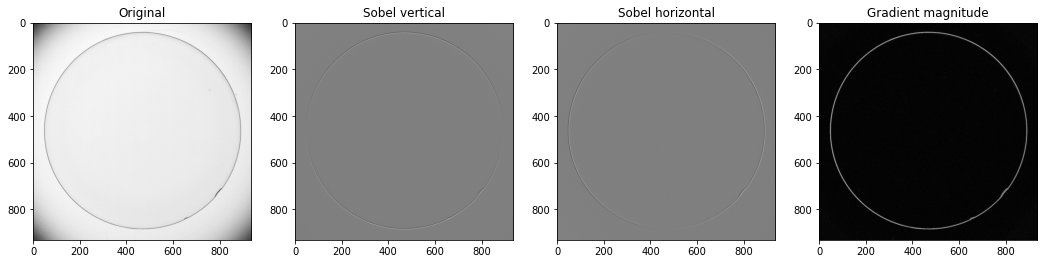

In [12]:
img = cv.imread(r'./contact_lens.tif', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img is not None

sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype = np.float32)
img_x = cv.filter2D(img, -1, sobel_v)

sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype = np.float32)
img_y = cv.filter2D(img, -1, sobel_h)

grad_mag = np.sqrt(img_x**2 + img_y**2)

fig, ax = plt.subplots(1,4, figsize=(18,6))
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[1].imshow(img_x, cmap='gray', vmin=-1020, vmax=1020)
ax[1].set_title('Sobel vertical')
ax[2].imshow(img_y, cmap='gray', vmin=-1020, vmax=1020)
ax[2].set_title('Sobel horizontal')
ax[3].imshow(grad_mag, cmap='gray')
ax[3].set_title('Gradient magnitude')
plt.show()

Part 2

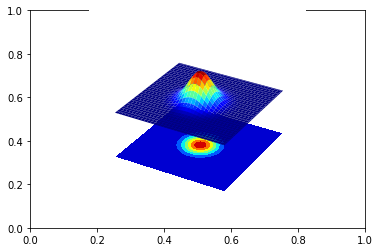

In [24]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import cm

fig, ax = plt.subplots()
ax = fig.add_subplot(111, projection = '3d')

step = 0.1
X = np.arange(-5, 5 + step, step)
Y = np.arange(-5, 5 + step, step)
XX, YY = np.meshgrid(X,Y)
sigma = 1
g = np.exp(-(XX**2 + YY**2)/(2*sigma**2))

surf = ax.plot_surface(XX, YY, g, cmap=cm.jet)
cset = ax.contourf(XX, YY, g, zdir='z', offset=np.min(g) - 1.5, cmap=cm.jet)
ax.set_zlim(np.min(g) -2, np.max(g))

plt.axis('off')
plt.show()


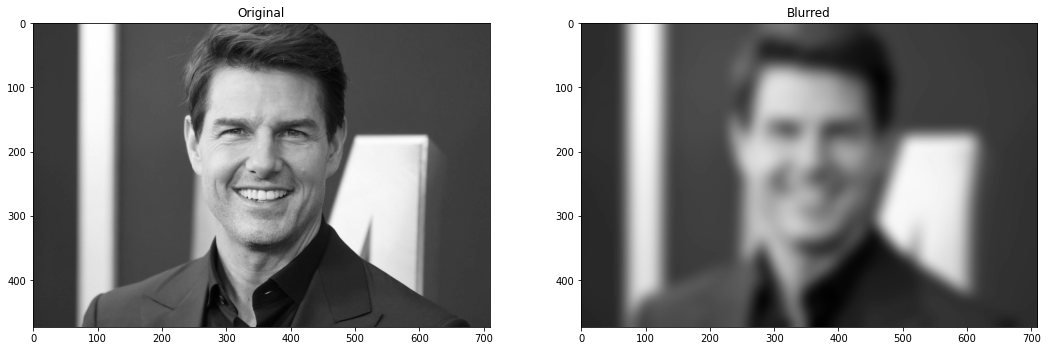

In [27]:
img = cv.imread(r'./tom.jpg', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img is not None

step = 0.1
X = np.arange(-2, 2 + step, step)
Y = np.arange(-2, 2 + step, step)
XX, YY = np.meshgrid(X,Y)
sigma = 1
g = np.exp(-(XX**2 + YY**2)/(2*sigma**2))
g /= np.sum(g)

img_blurred = cv.filter2D(img, -1, g)

fig,ax = plt.subplots(1,2, figsize=(18,6))

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original')

ax[1].imshow(img_blurred, cmap='gray')
ax[1].set_title('Blurred')

plt.show()

Part 4

Text(0.5, 1.0, 'Sharpened')

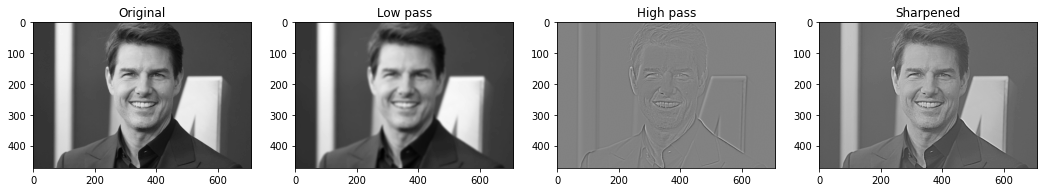

In [26]:
img = cv.imread(r'./tom.jpg', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img is not None

sigma = 3
gaussian_1d = cv.getGaussianKernel(10, sigma)

img_lp = cv.sepFilter2D(img, -1, gaussian_1d, gaussian_1d)
img_hp = img - img_lp 

img_sharpen = cv.addWeighted(img, 1.0, img_hp, 1.5, 0)
#img_sharpen = img + img_hp

fig, ax = plt.subplots(1,4, figsize=(18,6))
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[1].imshow(img_lp, cmap='gray')
ax[1].set_title('Low pass')
ax[2].imshow(img_hp, cmap='gray')
ax[2].set_title('High pass')
ax[3].imshow(img_sharpen, cmap='gray')
ax[3].set_title('Sharpened')